In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
import time
import sys
from def_conv_crs_2h import*
from numpy import*
import time 
from datetime import datetime



/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17


In [2]:
df1 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_no_no.csv') 
df2 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_no_yes.csv')
df3 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_yes_yes.csv')

In [3]:
df3

,NUP,NDO,NST,NSEA,AST,BUP,BDO,PP2,chi
0,0.178819,-0.127589,-0.193633,-0.161805,1.773505,1.930888,1.269920,0.112592,135.928365
1,0.188253,-0.098829,-0.298186,-0.145816,2.366920,2.548777,0.718083,0.095116,132.595779
2,0.202127,-0.136561,-0.218037,-0.149386,1.856511,2.867721,1.893080,0.106172,134.456468
3,0.212113,-0.109947,-0.274607,-0.156443,2.388394,2.741232,0.829529,0.114749,132.248545
4,0.183914,-0.085117,-0.224248,-0.159713,2.081732,2.213765,0.264482,0.114516,133.534382
...,...,...,...,...,...,...,...,...,...
995,0.231561,-0.195421,-0.304334,-0.175092,2.242594,2.506532,2.542656,0.121479,137.272143
996,0.213628,-0.106050,-0.321257,-0.184689,2.511357,2.084792,0.695024,0.124208,135.505035
997,0.197380,-0.076023,-0.231935,-0.145798,2.110980,2.884346,0.641016,0.100357,137.043225
998,0.199819,-0.099569,-0.205328,-0.168626,1.933979,2.446858,0.688302,0.126820,135.894372


In [4]:
df1['NUP'].mean()

0.15127536482431952

In [5]:
chi_min1 = 103.3
chi_min2 = 109.8
chi_min3 = 127.4

df1 = df1.loc[(df1['chi']<chi_min1+15.79)]
df2 = df2.loc[(df2['chi']<chi_min2+17.21)]
df3 = df3.loc[(df3['chi']<chi_min3+15.79)]

In [6]:
pol1 = polarization(0.27)
pol1.g_k = 'PV17'
pol1.mdl_den = 'pwr_lw_star'
pol1.mdl_num = 'gauss'
pol1.scale =10.58
pol1.mass = 1.115
pol1.bmax = 0.6
pol1.charm = 'no'


pol2 = polarization(0.27)
pol2.g_k = 'PV17'
pol2.mdl_den = 'pwr_lw_star'
pol2.mdl_num = 'gauss'
pol2.scale =10.58
pol2.mass = 1.115
pol2.bmax = 0.6
pol2.charm = 'yes'

pol3 = polarization(0.27)
pol3.g_k = 'PV17'
pol3.mdl_den = 'pwr_lw_star'
pol3.mdl_num = 'gauss'
pol3.scale =10.58
pol3.mass = 1.115
pol3.bmax = 0.6
pol3.charm = 'yes'



In [7]:
f_prm1=arange(0.,18.,1.)
f_prm1[0] = df1['NUP'].mean()
f_prm1[1] = df1['NDO'].mean()#par[0]  #do
f_prm1[2] = df1['NST'].mean()  #par[0]      #st
f_prm1[3] = df1['NSEA'].mean()  #par[0]      #upb
f_prm1[4] = f_prm1[3] #par[0]      #dob
f_prm1[5] = f_prm1[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm1[6] = 0 #par[0]      #aup
f_prm1[7] = 0 #par[0]      #ado
f_prm1[8] = df1['AST'].mean()  # par[0]      #ast
f_prm1[9] = 0# par[0]      #aupb
f_prm1[10] = f_prm1[9] #par[0]      #adob
f_prm1[11] = f_prm1[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm1[12] = df1['BUP'].mean() #par[0]      #bup
f_prm1[13] = 0 #par[0]      #bdo
f_prm1[14] = 0# par[0]      #bst
f_prm1[15] = df1['BSEA'].mean() #par[0]      #bupb
f_prm1[16] = f_prm1[15] #par[0]      #bdob
f_prm1[17] = f_prm1[15] # par[0]      #bstb
pp1 = np.float64(df1['PP2'].mean())
#pp=gauss.PP.astype(float)


In [8]:
f_prm2=arange(0.,18.,1.)
f_prm2[0] = df2['NUP'].mean()
f_prm2[1] = df2['NDO'].mean()#par[0]  #do
f_prm2[2] = df2['NST'].mean()  #par[0]      #st
f_prm2[3] = df2['NSEA'].mean()  #par[0]      #upb
f_prm2[4] = f_prm2[3] #par[0]      #dob
f_prm2[5] = f_prm2[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm2[6] = 0 #par[0]      #aup
f_prm2[7] = df2['ADO'].mean() #par[0]      #ado
f_prm2[8] = df2['AST'].mean()  # par[0]      #ast
f_prm2[9] = 0# par[0]      #aupb
f_prm2[10] = f_prm2[9] #par[0]      #adob
f_prm2[11] = f_prm2[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm2[12] = df2['BUP'].mean() #par[0]      #bup
f_prm2[13] = 0 #par[0]      #bdo
f_prm2[14] = 0# par[0]      #bst
f_prm2[15] = df2['BSEA'].mean() #par[0]      #bupb
f_prm2[16] = f_prm2[15] #par[0]      #bdob
f_prm2[17] = f_prm2[15] # par[0]      #bstb
pp2 = np.float64(df2['PP2'].mean())
#pp=gauss.PP.astype(float)


In [9]:
f_prm3=arange(0.,18.,1.)
f_prm3[0] = df3['NUP'].mean()
f_prm3[1] = df3['NUP'].mean()#par[0]  #do
f_prm3[2] = df3['NST'].mean()  #par[0]      #st
f_prm3[3] = df3['NSEA'].mean()  #par[0]      #upb
f_prm3[4] = df3['NSEA'].mean()  #par[0]      #dob
f_prm3[5] = df3['NDO'].mean()  # par[0]      #stb
#¯¯¯¯¯¯
f_prm3[6] = 0 #par[0]      #aup
f_prm3[7] = 0.#par[0]      #ado
f_prm3[8] = df3['AST'].mean()  # par[0]      #ast
f_prm3[9] = 0# par[0]      #aupb
f_prm3[10] = 0.#par[0]      #adob
f_prm3[11] = 0 #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm3[12] = df3['BUP'].mean() #par[0]      #bup
f_prm3[13] = df3['BUP'].mean()  #par[0]      #bdo
f_prm3[14] = 0# par[0]      #bst
f_prm3[15] = 0 #par[0]      #bupb
f_prm3[16] = 0 #par[0]      #bdob
f_prm3[17] = df3['BDO'].mean() # par[0]      #bstb
pp3 = np.float64(df3['PP2'].mean())
#pp=gauss.PP.astype(float)


In [26]:
zs = linspace(0.25,0.7,30)
xb=0.1

In [27]:
pls1=zeros(len(zs))
pls2=zeros(len(zs))
pls3=zeros(len(zs))

pls11=zeros(len(zs))
pls22=zeros(len(zs))
pls33=zeros(len(zs))

i=0
for zz in zs:
    pls1[i]= pol1.ratio('lbd','PP',zz,xb,f_prm1,pp1,0.)
    pls2[i]= pol2.ratio('lbd','PP',zz,xb,f_prm2,pp2,0)
    pls3[i]= pol3.ratio('lbd','PP',zz,xb,f_prm3,pp3,0)

    
    pls11[i]= pol1.ratio('lbd_b','PP',zz,xb,f_prm1,pp1,0.)
    pls22[i]= pol2.ratio('lbd_b','PP',zz,xb,f_prm2,pp2,0)
    pls33[i]= pol3.ratio('lbd_b','PP',zz,xb,f_prm3,pp3,0)

    i+=1

In [28]:
y_lbl=50
x_lbl =50
ers_bar = 2.  # dimensione barre errore
pnt_dat = 9 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione

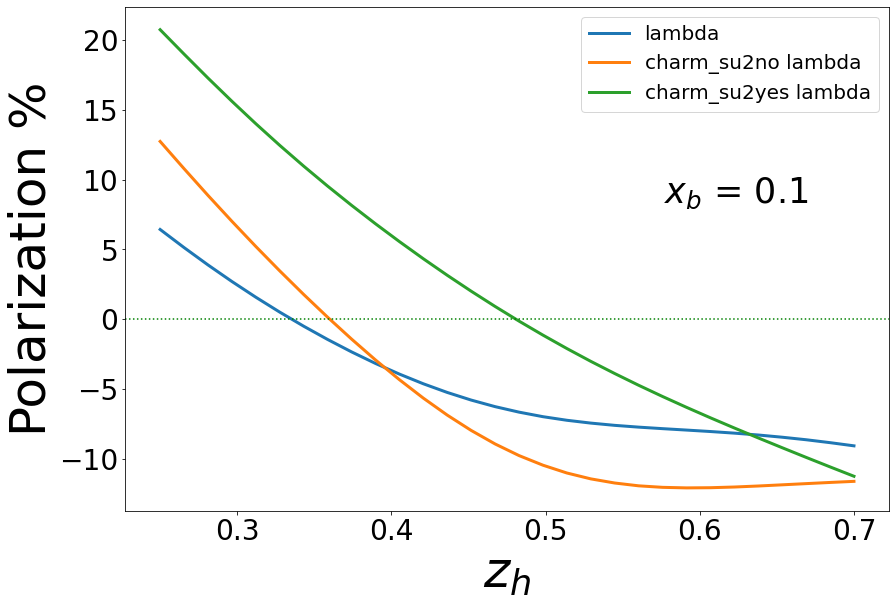

In [29]:
fig1, ax = plt.subplots()
plot(zs,pls1*100,label='lambda',linewidth=fit_l)
plot(zs,pls2*100,label='charm_su2no lambda',linewidth=fit_l)
plot(zs,pls3*100,label='charm_su2yes lambda',linewidth=fit_l)
ylabel('Polarization %',size=y_lbl)
xlabel('$z_h$',size=y_lbl)
title('$x_b$ = '+ str(xb),fontsize=title_s,x=0.8, y=0.6) 

#ylim(-10,35)
tick_params(axis='both', which='major', labelsize=28)
axhline(y = 0., color = 'g', linestyle = 'dotted')
legend(loc='upper right',bbox_to_anchor=(1.,1.), fontsize=20,frameon=True)
fig1.subplots_adjust(top=0.9,bottom=0.2,left=0.230,right=0.76,hspace=0.,wspace=0.)

fig1.set_size_inches(20., 10., forward=True)
#fig1.savefig('pol_sidis_lambda_xb_'+str(xb)+'.pdf')


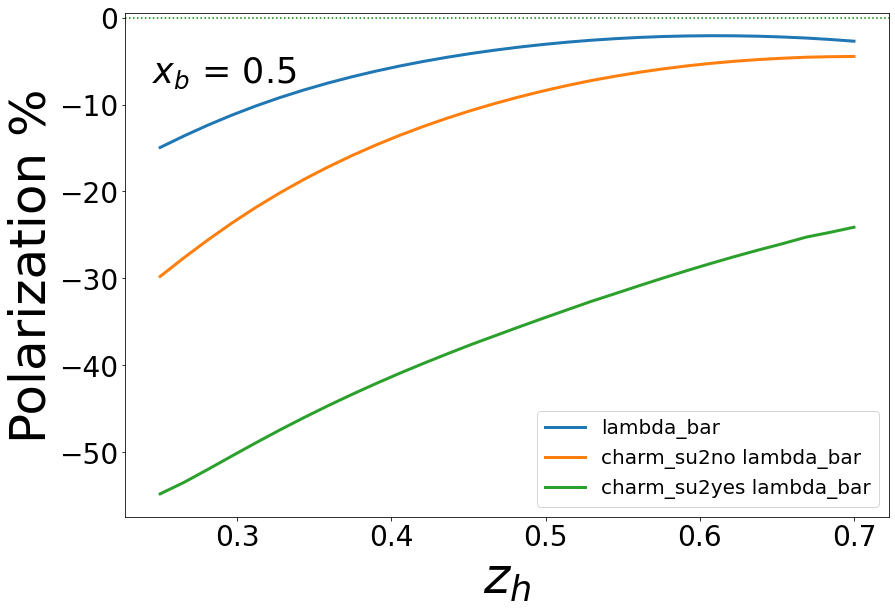

In [14]:
fig1, ax = plt.subplots()

plot(zs,pls11*100,label='lambda_bar',linewidth=fit_l)
plot(zs,pls22*100,label='charm_su2no lambda_bar',linewidth=fit_l)
plot(zs,pls33*100,label='charm_su2yes lambda_bar',linewidth=fit_l)
ylabel('Polarization %',size=y_lbl)
xlabel('$z_h$',size=y_lbl)
title('$x_b$ = '+ str(xb),fontsize=title_s,x=0.13, y=0.85) 

#ylim(-10,35)
tick_params(axis='both', which='major', labelsize=28)
axhline(y = 0., color = 'g', linestyle = 'dotted')
legend(loc='lower right', fontsize=20,frameon=True)
fig1.subplots_adjust(top=0.9,bottom=0.2,left=0.230,right=0.76,hspace=0.,wspace=0.)

fig1.set_size_inches(20., 10., forward=True)
#fig1.savefig('pol_sidis_lambda_bar_xb_'+str(xb)+'.pdf')

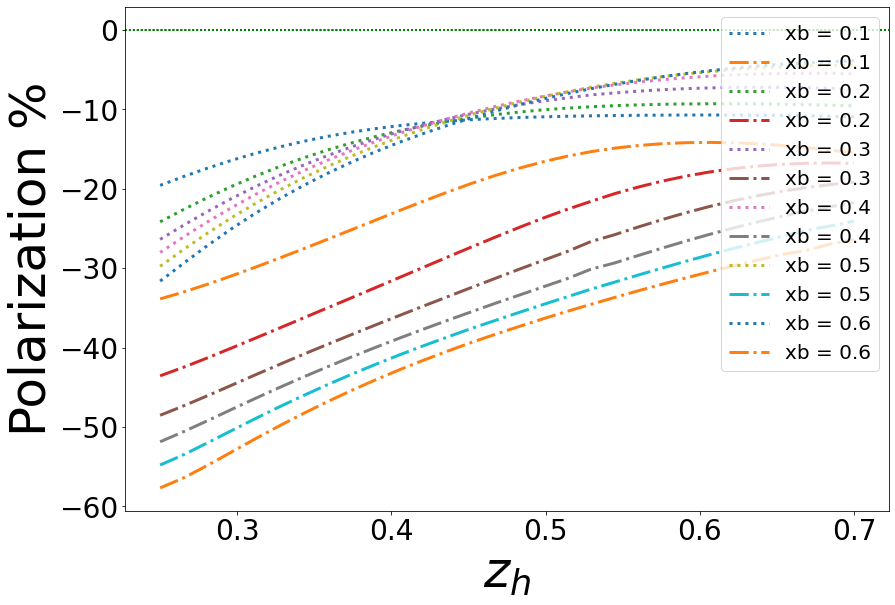

In [43]:
fig1, ax = plt.subplots()
xbs=[0.1,.2,.3,.4,.5,.6]
for xb in xbs:
    pls1=zeros(len(zs))
    pls1=zeros(len(zs))
    pls2=zeros(len(zs))
    pls3=zeros(len(zs))

    pls11=zeros(len(zs))
    pls22=zeros(len(zs))
    pls33=zeros(len(zs))

    i=0
    for zz in zs:
        pls1[i]= pol1.ratio('lbd','PP',zz,xb,f_prm1,pp1,0.)
        pls2[i]= pol2.ratio('lbd','PP',zz,xb,f_prm2,pp2,0)
        pls3[i]= pol3.ratio('lbd','PP',zz,xb,f_prm3,pp3,0)


        pls11[i]= pol1.ratio('lbd_b','PP',zz,xb,f_prm1,pp1,0.)
        pls22[i]= pol2.ratio('lbd_b','PP',zz,xb,f_prm2,pp2,0)
        pls33[i]= pol3.ratio('lbd_b','PP',zz,xb,f_prm3,pp3,0)

        i+=1
    
    
    #plot(zs,pls1*100,label='xb = '+str(xb),linewidth=fit_l)
    #plot(zs,pls2*100,label='xb = '+str(xb),linewidth=fit_l,linestyle=':')
    #plot(zs,pls3*100,label='xb = '+str(xb),linewidth=fit_l,linestyle='-.')
    #plot(zs,pls11*100,label='xb = '+str(xb),linewidth=fit_l)
    plot(zs,pls22*100,label='xb = '+str(xb),linewidth=fit_l,linestyle=':')
    plot(zs,pls33*100,label='xb = '+str(xb),linewidth=fit_l,linestyle='-.')

    ylabel('Polarization %',size=y_lbl)
    xlabel('$z_h$',size=y_lbl)

    #ylim(-10,35)
    tick_params(axis='both', which='major', labelsize=28)
    axhline(y = 0., color = 'g', linestyle = 'dotted')
    legend(loc='lower right', fontsize=20,frameon=True)
    fig1.subplots_adjust(top=0.9,bottom=0.2,left=0.230,right=0.76,hspace=0.,wspace=0.)

    fig1.set_size_inches(20., 10., forward=True)
    legend(loc='upper right', fontsize=20,frameon=True)
        